## Kato pipeline

In this notebook, we reproduce PCA results from Kato, et al. starting with Kato's raw data, transforming it as he did, and running PCA on the resulting data.

In [22]:
import sys
import os

%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
import numpy as np

sys.path.append('../src/')
sys.path.append('../lib/')
import data_config as dc
from tvregdiff import TVRegDiff
from analysis import Analyzer

%load_ext autoreload
%autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
wormData = dc.kato_matlab.retrieve()

In [24]:
derivData = Analyzer(wormData[0]['deltaFOverF_deriv'][:,0:500].T)
rawData = Analyzer(wormData[0]['deltaFOverF'][:,0:500].T)
print(derivData.timeseries.shape)
print(rawData.timeseries.shape)

(500, 107)
(500, 107)


In [25]:
computedDerivData = Analyzer(rawData.tvd(iters=20, alpha=1e-1, diff=None))

('Completed:', 0)
('Completed:', 10)
('Completed:', 20)
('Completed:', 30)
('Completed:', 40)
('Completed:', 50)
('Completed:', 60)
('Completed:', 70)
('Completed:', 80)
('Completed:', 90)
('Completed:', 100)


### Graphs
The first row of graphs shows:

- Column 1: Kato's "raw" (deltaFoverF) data, as he provided it
- Column 2: Kato's derivative data (deltaFoverFderiv), as he provided it
- Column 3: OUR calculation of PCA on KATO's derivative data


The second row of graphs shows:

- Column 1: Kato's "raw" (deltaFoverF) data, as he provided it
- Column 2: OUR calculation of derivative data, using an off-the-shelf implementation of TVRegDiff (Chartrand, et al.)
- Column 3: OUR calculation of PCA on OUR derivative data

NOTE: Only 500 timesteps are plotted. The derivative function seemed to be overfitting for more timesteps than that. TODO: further debug/optimize it.


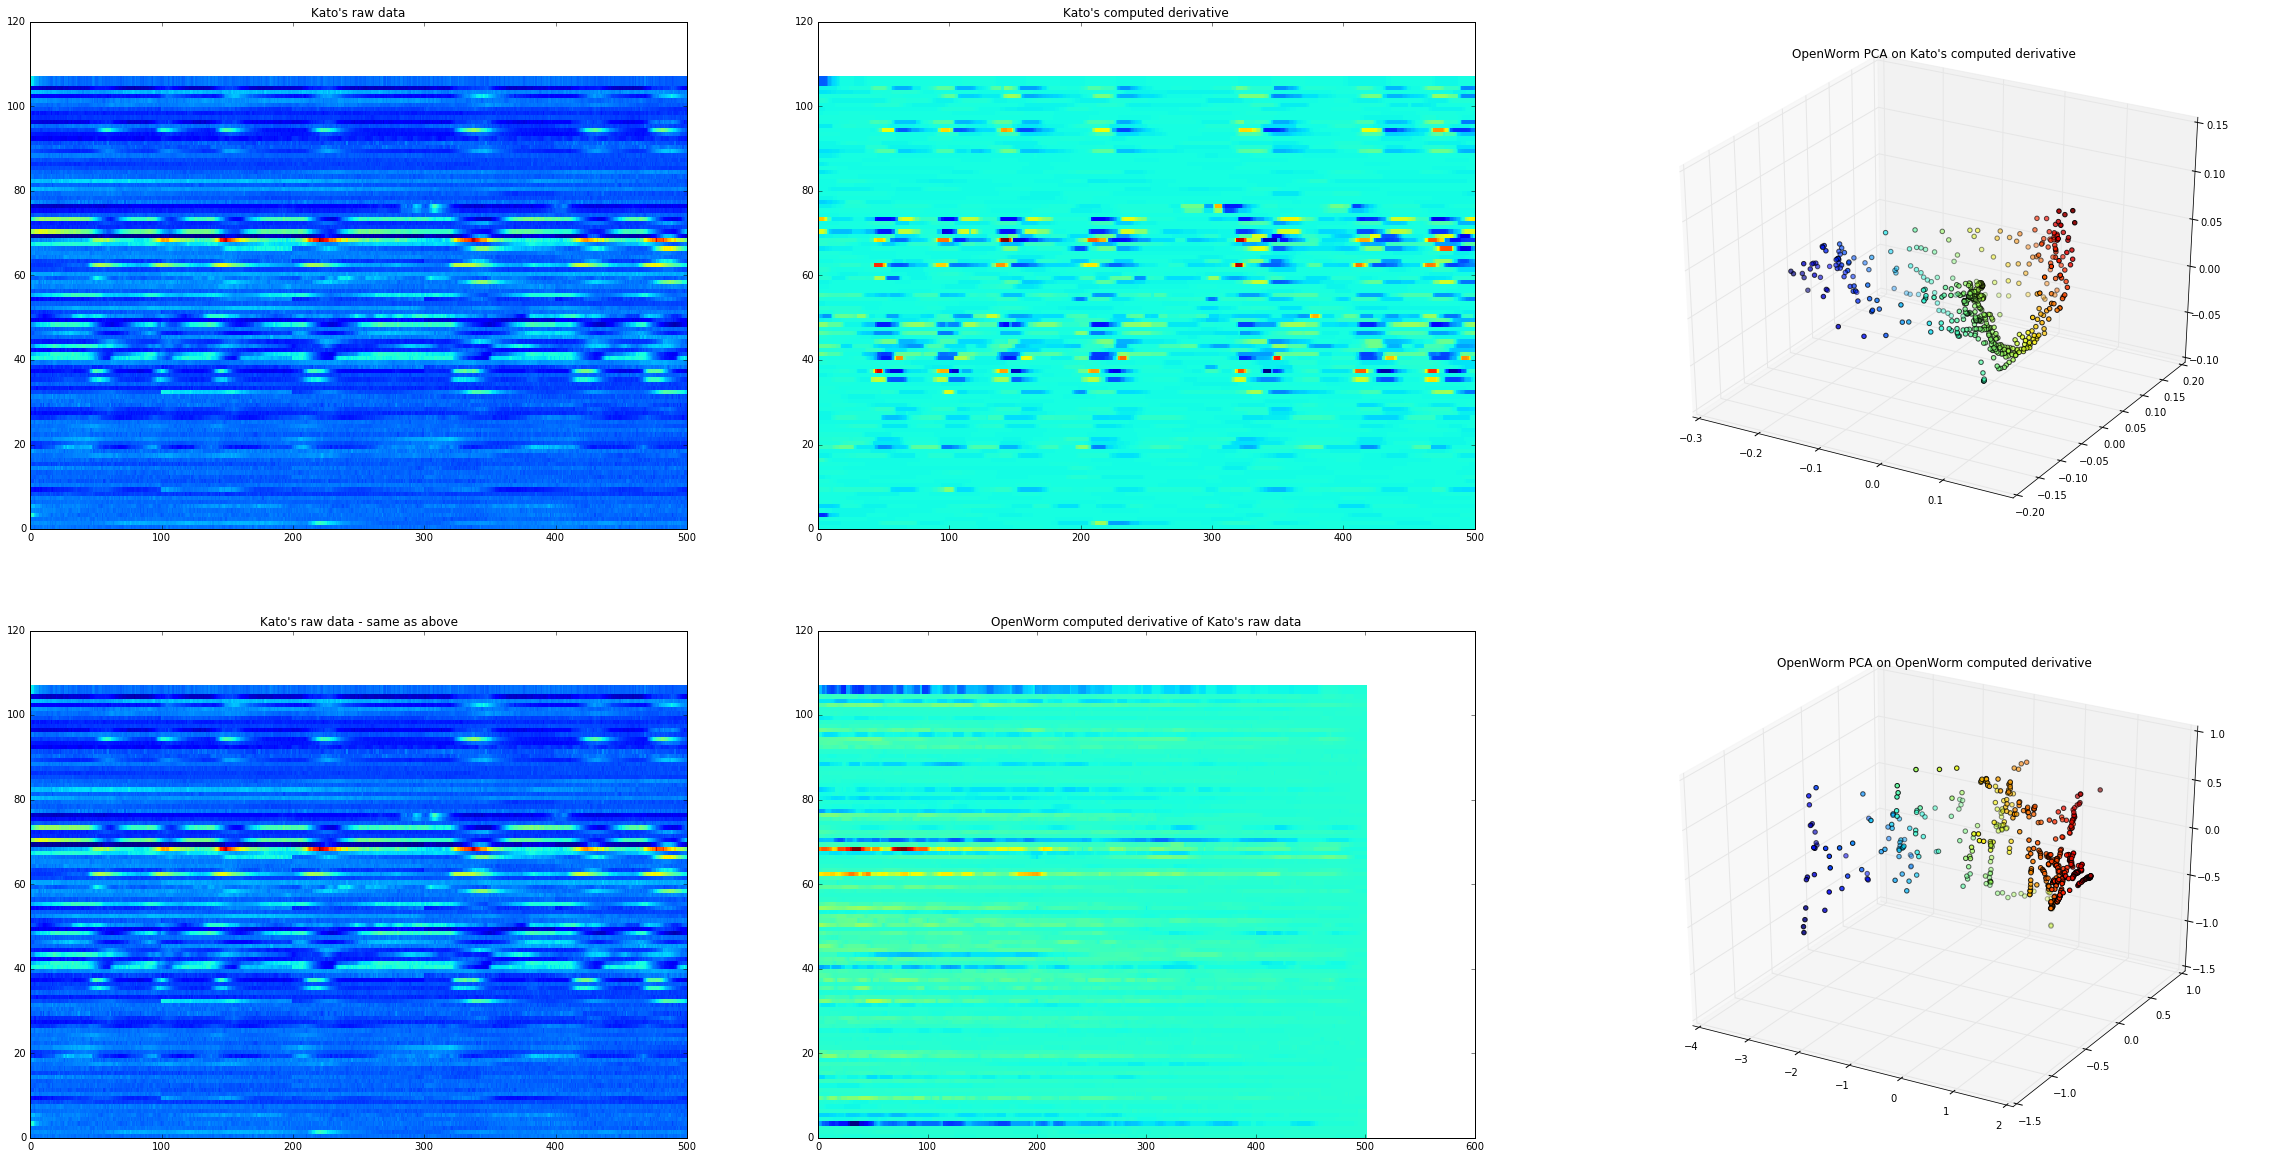

In [26]:
fig = plt.figure(figsize=(40,20))

ax_raw1 = fig.add_subplot(2, 3, 1)
ax_deriv1 = fig.add_subplot(2, 3, 2)
ax_pca1 = fig.add_subplot(2, 3, 3, projection='3d')

ax_raw2 = fig.add_subplot(2,3,4)
ax_deriv2 = fig.add_subplot(2,3,5)
ax_pca2 = fig.add_subplot(2,3,6, projection='3d')

ax_raw1.set_title("Kato's raw data")
ax_deriv1.set_title("Kato's computed derivative")
ax_pca1.set_title("OpenWorm PCA on Kato's computed derivative")

ax_raw2.set_title("Kato's raw data - same as above")
ax_deriv2.set_title("OpenWorm computed derivative of Kato's raw data")
ax_pca2.set_title("OpenWorm PCA on OpenWorm computed derivative")

rawData.timeseries_plot(ax_raw1)
derivData.timeseries_plot(ax_deriv1)
derivData.pca_plot3d(ax_pca1)

rawData.timeseries_plot(ax_raw2)
computedDerivData.timeseries_plot(ax_deriv2)
computedDerivData.pca_plot3d(ax_pca2)

plt.show()